In [257]:
import seaborn as sns;
import pandas as pd;
import numpy as np;
from sklearn.model_selection import cross_val_score;
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits;

In [258]:
load_digits

<function sklearn.datasets._base.load_digits(*, n_class=10, return_X_y=False, as_frame=False)>

In [259]:
digits = load_digits()

In [260]:
images = digits.images

In [261]:
targets = digits.target

In [262]:
images.shape

(1797, 8, 8)

In [263]:
X = images.reshape(-1,64)

In [264]:
X.shape

(1797, 64)

In [265]:
Y = targets

In [266]:
Y.shape

(1797,)

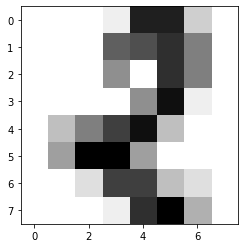

In [267]:
plt.imshow(images[54], cmap='binary')

In [268]:
targets[54]

2

In [269]:
def show_example(index):
    print(targets[index])
    targets[index]
    plt.imshow(images[index], cmap='binary')
    plt.show()
    print() # Sauter une ligne

8


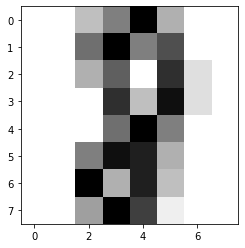

In [270]:
show_example(53)

## Isolation

In [271]:
x = images.reshape(-1, 64)

In [272]:
Y = targets

In [273]:
from sklearn.model_selection import train_test_split as TTS

In [274]:
X_tr, X_te, Y_tr, Y_te = TTS(X, Y,
                            stratify = Y,
                            random_state=777,
                            train_size=0.8)

In [275]:
for each in [X_tr, X_tr, Y_tr, Y_te]:
    print(each.shape)

(1437, 64)
(1437, 64)
(1437,)
(360,)


## Pipeline : Mise en place

In [276]:
# pipeline elements
from sklearn.decomposition import PCA # PCA = Principal Component Analysis
from sklearn.neighbors import KNeighborsClassifier as KNN 

# pipeline materiaux
from sklearn.pipeline import Pipeline # PCA = Principal Component Analysis
from sklearn.model_selection import GridSearchCV

In [277]:
# Créer la pipeline
#
# Enssemble d'algorithme compliqué

pipeline_details = [('pca', PCA()),  # Algo pca
                  ('knn', KNN())]    # Algo knn

In [278]:
pipeline = Pipeline(pipeline_details)

In [279]:
pipeline

Pipeline(steps=[('pca', PCA()), ('knn', KNeighborsClassifier())])

In [280]:
# Paramètrer la Grid Search
hyperparameters = {}
hyperparameters['pca__n_components'] = list(range(1, 64+1, 3))
hyperparameters['knn__n_neighbors'] = [1, 2, 3, 9, 21]

hyperparameters

{'pca__n_components': [1,
  4,
  7,
  10,
  13,
  16,
  19,
  22,
  25,
  28,
  31,
  34,
  37,
  40,
  43,
  46,
  49,
  52,
  55,
  58,
  61,
  64],
 'knn__n_neighbors': [1, 2, 3, 9, 21]}

In [281]:
# Créer la grid search

hyperparameter_search = GridSearchCV(pipeline,
                                    hyperparameters,
                                    scoring='accuracy',
                                    cv=5)

In [282]:
hyperparameter_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 9, 21],
                         'pca__n_components': [1, 4, 7, 10, 13, 16, 19, 22, 25,
                                               28, 31, 34, 37, 40, 43, 46, 49,
                                               52, 55, 58, 61, 64]},
             scoring='accuracy')

In [283]:
#GO

hyperparameter_search.fit(X_tr, Y_tr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 9, 21],
                         'pca__n_components': [1, 4, 7, 10, 13, 16, 19, 22, 25,
                                               28, 31, 34, 37, 40, 43, 46, 49,
                                               52, 55, 58, 61, 64]},
             scoring='accuracy')

## Recolter les résultats

In [238]:
hyperparameter_search.best_score_

0.985387630662021

In [239]:
hyperparameter_search.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 43}

In [240]:
pca = PCA(n_components=43)
knn = KNN(n_neighbors=3)

In [241]:
pca.fit(X_tr)

PCA(n_components=43)

In [242]:
pca.fit(X_tr)

PCA(n_components=43)

In [244]:
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

knn.fit(X_tr_PCA, Y_tr)
predictions = knn.predict(X_te_PCA)

In [245]:
knn.fit(X_tr_PCA,Y_tr)

KNeighborsClassifier(n_neighbors=3)

In [246]:
accuracy = lambda p,y: (p==y).sum()/p.shape[0]
"TEST ACCURACY: ", accuracy(predictions, Y_te)

('TEST ACCURACY: ', 0.9944444444444445)

In [247]:
train_preds = knn.predict(X_tr_PCA)
"TRAIN ACCURACY: ", accuracy(train_preds, Y_tr)

('TRAIN ACCURACY: ', 0.9916492693110647)

In [248]:
train_preds = knn.predict(X_tr_PCA)

## Confusion matrix


In [249]:
(train_preds, Y_tr)
(predictions, Y_te)

from sklearn.metrics import confusion_matrix

labels = range(10)
cm_train = confusion_matrix(train_preds, Y_tr, labels=labels)
cm_test = confusion_matrix(predictions, Y_te, labels=labels)

In [250]:
labels

range(0, 10)

In [251]:
def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

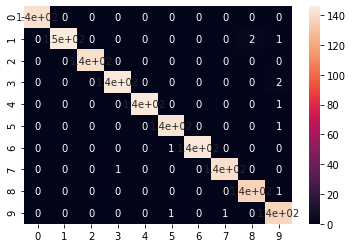

In [252]:
show_cm(cm_train, labels)

In [253]:
cm_train

array([[142,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 146,   0,   0,   0,   0,   0,   0,   2,   1],
       [  0,   0, 142,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 145,   0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0, 145,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0, 143,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1, 145,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0, 142,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 137,   1],
       [  0,   0,   0,   0,   0,   1,   0,   1,   0, 138]], dtype=int64)

In [254]:
cm_test

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 35]], dtype=int64)

In [255]:
import pandas as pd

def show_cm(cm, labels):
  df_cm = pd.DataFrame(cm,labels, labels)
  sns.heatmap(df_cm, annot=True)
  plt.show()

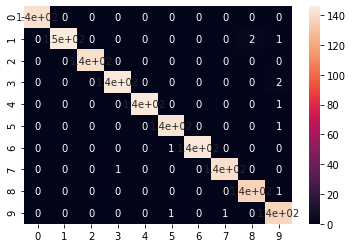

In [256]:
show_cm(cm_train, labels)